In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("\n‚úÖüîó Google Drive successfully mounted to /content/drive ‚Äî all your files are now accessible! üöÄüìÇ\n")


Mounted at /content/drive

‚úÖüîó Google Drive successfully mounted to /content/drive ‚Äî all your files are now accessible! üöÄüìÇ



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import numpy as np

print("\n‚úÖüìö All essential libraries imported successfully ‚Äî Environment is ready for action! ‚öôÔ∏èüß†\n")



‚úÖüìö All essential libraries imported successfully ‚Äî Environment is ready for action! ‚öôÔ∏èüß†



In [ ]:
base_path = "/content/drive/MyDrive/fdy_datset/"

def count_files(folder):
    image_count = len(glob.glob(f"{folder}/images/*.jpg"))
    label_count = len(glob.glob(f"{folder}/labels/*.txt"))
    return image_count, label_count

for split in ["train", "val", "test"]:
    img_cnt, lbl_cnt = count_files(base_path + split)
    print(f"{split.upper()}: {img_cnt} images, {lbl_cnt} labels")

print("\nüìä‚úÖ Dataset integrity check complete ‚Äî Image & Label stats displayed for all splits! üî•üóÇÔ∏è\n")


TRAIN: 3900 images, 3900 labels
VAL: 1310 images, 1300 labels
TEST: 1300 images, 1300 labels

üìä‚úÖ Dataset integrity check complete ‚Äî Image & Label stats displayed for all splits! üî•üóÇÔ∏è



In [ ]:
def check_missing_labels(split):
    img_paths = glob.glob(f"{base_path}/{split}/images/*.jpg")
    miss_count = 0
    for img_path in img_paths:
        label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")
        if not os.path.exists(label_path):
            print("‚ùå Missing label for:", img_path)
            miss_count += 1
    print(f"üîé Total missing labels in {split.upper()}: {miss_count}\n")

for split in ["train", "val", "test"]:
    check_missing_labels(split)

print("\n‚úÖüìã Label validation complete ‚Äî All dataset splits have been checked for missing labels! üî•\n")


üîé Total missing labels in TRAIN: 0

‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1209 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1212 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1205 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1204 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1208 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_121 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1210 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1207 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1211 (1).jpg
‚ùå Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1206 (1).jpg
üîé Total missing labels in VAL: 10

üîé Total missing labels in TEST: 0


‚úÖüìã Label validation 

In [ ]:
def read_labels(split):
    label_files = glob.glob(f"{base_path}/{split}/labels/*.txt")
    all_data = []
    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                all_data.append([split, file, int(cls), x_center, y_center, width, height])
    return pd.DataFrame(all_data, columns=["split", "file", "class", "x_center", "y_center", "width", "height"])

df_labels = pd.concat([read_labels(s) for s in ["train", "val", "test"]], ignore_index=True)
df_labels.head()

print("\n‚úÖüìÑ Label data from all splits loaded into DataFrame ‚Äî ready for analysis & visualization! üß†üìä\n")



‚úÖüìÑ Label data from all splits loaded into DataFrame ‚Äî ready for analysis & visualization! üß†üìä



In [ ]:
from glob import glob

label_path = "/content/drive/MyDrive/fdy_datset"
all_classes = set()

for split in ["train", "val", "test"]:
    label_files = glob(f"{label_path}/{split}/labels/*.txt")
    for file in label_files:
        with open(file, 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])
                all_classes.add(class_id)

print("Classes found in dataset:", all_classes)
print(f"\n‚úÖüß† Unique class extraction complete ‚Äî Found {len(all_classes)} unique class(es): {sorted(all_classes)} üîçüìä\n")


Classes found in dataset: {0, 1}

‚úÖüß† Unique class extraction complete ‚Äî Found 2 unique class(es): [0, 1] üîçüìä



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


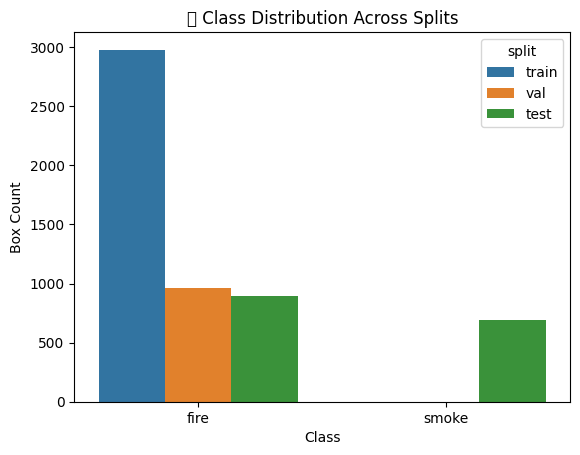


üìä‚úÖ Visualized class distribution across train/val/test splits ‚Äî Check for balance between 'fire' and 'smoke' labels! üî•üü†üí®



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping class IDs to names
class_names = {0: 'fire', 1: 'smoke'}
df_labels["class_name"] = df_labels["class"].map(class_names)

# Plotting class distribution
sns.countplot(x="class_name", hue="split", data=df_labels)
plt.title("Class Distribution Across Splits")
plt.xlabel("Class")
plt.ylabel("Box Count")
plt.show()

print("\nüìä‚úÖ Visualized class distribution across train/val/test splits ‚Äî Check for balance between 'fire' and 'smoke' labels! üî•üü†üí®\n")


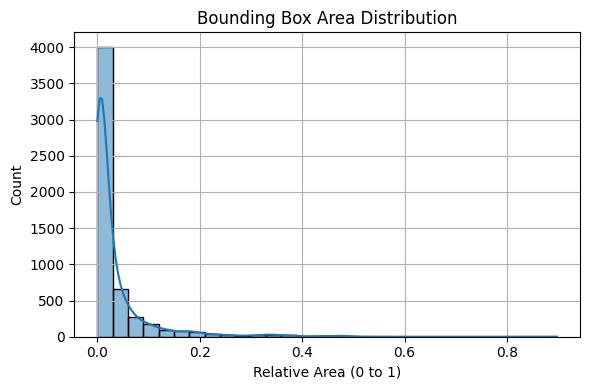


üì¶‚úÖ Bounding box area distribution plotted ‚Äî gives insights into object size variation across the dataset! üìèüìä



In [ ]:
df_labels["bbox_area"] = df_labels["width"] * df_labels["height"]

plt.figure(figsize=(6, 4))
sns.histplot(df_labels["bbox_area"], bins=30, kde=True)
plt.title("Bounding Box Area Distribution")
plt.xlabel("Relative Area (0 to 1)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nüì¶‚úÖ Bounding box area distribution plotted ‚Äî gives insights into object size variation across the dataset! üìèüìä\n")


/tmp/ipython-input-9-418541045.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


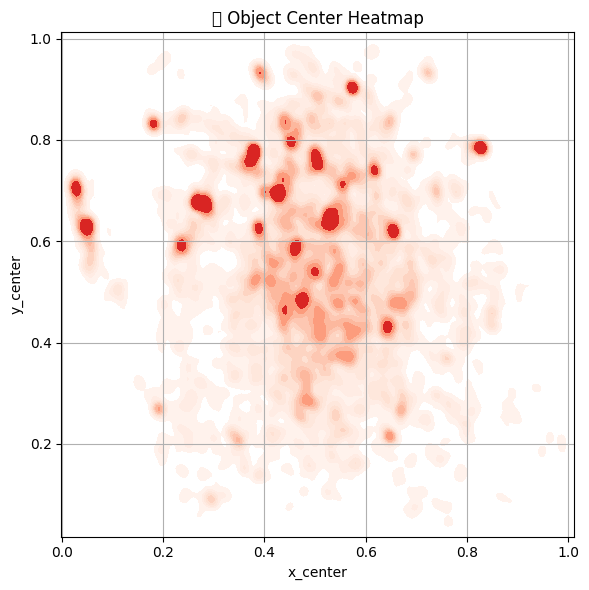


üéØ‚úÖ Object center heatmap generated ‚Äî observe spatial label concentration in dataset! üìçüì∏



In [ ]:
plt.figure(figsize=(6, 6))
sns.kdeplot(
    x=df_labels["x_center"],
    y=df_labels["y_center"],
    cmap="Reds",
    fill=True,
    bw_adjust=0.2
)
plt.title("Object Center Heatmap")
plt.xlabel("x_center")
plt.ylabel("y_center")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nüéØ‚úÖ Object center heatmap generated ‚Äî observe spatial label concentration in dataset! üìçüì∏\n")


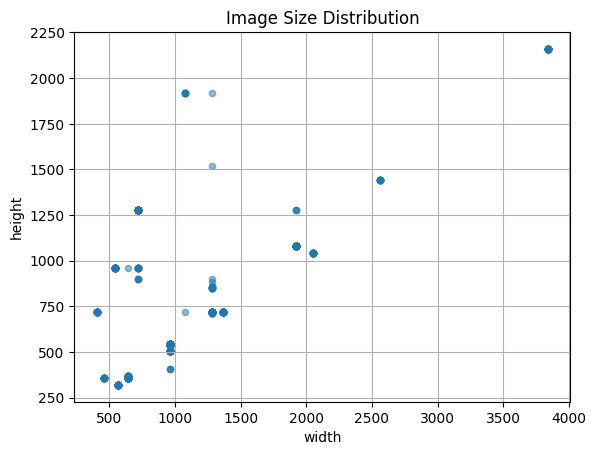


üìê‚úÖ Image dimension check complete ‚Äî Scatter plot visualized to ensure consistent sizes! üñºÔ∏èüîç



In [ ]:
import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# üìÇ Base path to the dataset
base_path = "/content/drive/MyDrive/fdy_datset"

# üß∞ Function to extract width and height of images
def get_image_shapes(split):
    img_shapes = []
    img_paths = glob.glob(f"{base_path}/{split}/images/*.jpg")
    for img_path in img_paths:
        try:
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                img_shapes.append((w, h))
            else:
                print("‚ùå Unreadable image:", img_path)
        except Exception as e:
            print("‚ö†Ô∏è Error reading:", img_path, "|", e)
    return img_shapes

# üìä Collect and plot image shape data for 'train' split
shapes = get_image_shapes("train")
shapes_df = pd.DataFrame(shapes, columns=["width", "height"])

# üìâ Scatter plot of width vs height
shapes_df.plot(kind="scatter", x="width", y="height", title="Image Size Distribution", alpha=0.5)
plt.grid(True)
plt.show()

print("\nüìê‚úÖ Image dimension check complete ‚Äî Scatter plot visualized to ensure consistent sizes! üñºÔ∏èüîç\n")


/tmp/ipython-input-11-3336729829.py:13: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


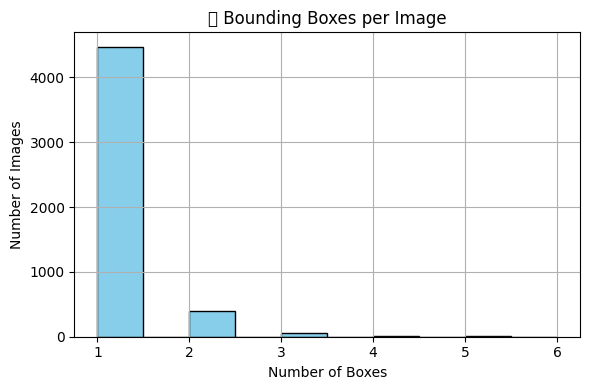


üìä‚úÖ Bounding box distribution per image plotted ‚Äî check for annotation density across dataset! üßÆüì¶



In [ ]:
bbox_per_image = df_labels.groupby("file").size().reset_index(name="bbox_count")

plt.figure(figsize=(6, 4))
plt.hist(bbox_per_image["bbox_count"], bins=10, color='skyblue', edgecolor='black')
plt.title("Bounding Boxes per Image")
plt.xlabel("Number of Boxes")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nüìä‚úÖ Bounding box distribution per image plotted ‚Äî check for annotation density across dataset! üßÆüì¶\n")


In [ ]:
import cv2
import os
from glob import glob

def remove_corrupted_images(folder):
    corrupted = 0
    for img_path in glob(folder + "/*.jpg"):
        try:
            img = cv2.imread(img_path)
            if img is None:
                os.remove(img_path)
                print(f"‚ùå Removed corrupted: {img_path}")
                corrupted += 1
        except:
            os.remove(img_path)
            print(f"‚ö†Ô∏è Force removed unreadable image: {img_path}")
            corrupted += 1
    return corrupted

# üöÄ Run on all splits
total_corrupted = 0
for split in ["train", "val", "test"]:
    folder = f"{base_path}/{split}/images"
    count = remove_corrupted_images(folder)
    total_corrupted += count

print(f"\nüßπ‚úÖ Image cleaning complete ‚Äî {total_corrupted} corrupted image(s) removed from all splits! ‚ú®üñºÔ∏è\n")



üßπ‚úÖ Image cleaning complete ‚Äî 0 corrupted image(s) removed from all splits! ‚ú®üñºÔ∏è



In [ ]:
from glob import glob
import os

def check_missing_labels(split):
    img_dir = f"{base_path}/{split}/images"
    missing = []
    for img_path in glob(img_dir + "/*.jpg"):
        label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")
        if not os.path.exists(label_path):
            missing.append(img_path)
    print(f"‚ö†Ô∏è {split.upper()}: {len(missing)} image(s) missing labels")
    return missing

for split in ["train", "val", "test"]:
    check_missing_labels(split)

print("\nüîé‚úÖ Missing label check completed ‚Äî All splits verified for unmatched image-label pairs! üìÇüö´\n")


‚ö†Ô∏è TRAIN: 0 image(s) missing labels
‚ö†Ô∏è VAL: 10 image(s) missing labels
‚ö†Ô∏è TEST: 0 image(s) missing labels

üîé‚úÖ Missing label check completed ‚Äî All splits verified for unmatched image-label pairs! üìÇüö´



In [ ]:
def sanity_check_labels(split):
    issues = 0
    label_dir = f"{base_path}/{split}/labels"
    for lbl_path in glob(label_dir + "/*.txt"):
        with open(lbl_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"‚ùå Invalid format in {lbl_path}: {line}")
                    issues += 1
                    continue
                try:
                    cls, xc, yc, w, h = map(float, parts)
                    if not (0 <= xc <= 1 and 0 <= yc <= 1 and 0 <= w <= 1 and 0 <= h <= 1):
                        print(f"‚ö†Ô∏è Out-of-bound values in {lbl_path}: {line}")
                        issues += 1
                except ValueError:
                    print(f"‚ùó Non-numeric values in {lbl_path}: {line}")
                    issues += 1
    print(f"üîç {split.upper()}: Found {issues} invalid label line(s)")

for split in ["train", "val", "test"]:
    sanity_check_labels(split)

print("\nüß†‚úÖ Label sanity check finished ‚Äî Format and value validation complete across all dataset splits! üìèüìÇ\n")


üîç TRAIN: Found 0 invalid label line(s)
üîç VAL: Found 0 invalid label line(s)
üîç TEST: Found 0 invalid label line(s)

üß†‚úÖ Label sanity check finished ‚Äî Format and value validation complete across all dataset splits! üìèüìÇ



In [ ]:
import cv2

def check_image_shapes(split):
    img_dir = f"{base_path}/{split}/images"
    shapes = set()
    for img_path in glob(img_dir + "/*.jpg"):
        img = cv2.imread(img_path)
        if img is not None:
            shapes.add(img.shape[:2])
    print(f"üìè {split.upper()}: Unique image sizes: {shapes}")

for split in ["train", "val", "test"]:
    check_image_shapes(split)

print("\nüìê‚úÖ Image shape consistency check complete ‚Äî All dataset splits scanned for size variations! üîçüñºÔ∏è\n")


üìè TRAIN: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (320, 568), (506, 960), (852, 1280), (854, 1280), (859, 1279), (900, 1280), (360, 640), (1440, 2560), (1920, 1080), (720, 406), (886, 1280), (960, 540), (853, 1280), (960, 720), (2160, 3840), (408, 960), (540, 960), (360, 462), (1080, 1920), (855, 1280), (1280, 1920), (716, 1280), (368, 640), (900, 720), (960, 640), (720, 1366), (1920, 1280), (544, 960), (720, 1079), (1519, 1280)}
üìè VAL: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (320, 568), (506, 960), (854, 1280), (360, 640), (1440, 2560), (1920, 1080), (720, 406), (960, 720), (960, 540), (853, 1280), (2160, 3840), (408, 960), (540, 960), (360, 462), (1080, 1920), (716, 1280), (368, 640), (720, 1366), (853, 1279), (544, 960)}
üìè TEST: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (1920, 1920), (320, 568), (506, 960), (1440, 1920), (1277, 1920), (854, 1219), (360, 640), (1440, 2560), (1920,

In [ ]:
from PIL import Image

def convert_png_to_jpg(split):
    img_dir = f"{base_path}/{split}/images"
    converted = 0
    for img_path in glob(img_dir + "/*.png"):
        jpg_path = img_path.replace(".png", ".jpg")
        img = Image.open(img_path).convert("RGB")
        img.save(jpg_path, "JPEG")
        os.remove(img_path)
        print(f"üåÄ Converted: {img_path} ‚ûú {jpg_path}")
        converted += 1
    print(f"‚úÖ {split.upper()}: {converted} PNG image(s) converted to JPG\n")

for split in ["train", "val", "test"]:
    convert_png_to_jpg(split)

print("\nüñºÔ∏è‚úÖ PNG to JPG conversion complete for all dataset splits ‚Äî Format consistency achieved! üéØ\n")


‚úÖ TRAIN: 0 PNG image(s) converted to JPG

‚úÖ VAL: 0 PNG image(s) converted to JPG

‚úÖ TEST: 0 PNG image(s) converted to JPG


üñºÔ∏è‚úÖ PNG to JPG conversion complete for all dataset splits ‚Äî Format consistency achieved! üéØ



In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

print("\nüõ†Ô∏è‚úÖ YOLOv5 repository cloned and environment setup complete ‚Äî Ready to roll! üöÄüì¶\n")


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 50.7 MB/s eta

In [ ]:
import torch
from yolov5.models.common import DetectMultiBackend

# ‚úÖ Check if YOLOv5 is ready
print("\n‚úÖüß† YOLOv5 import successful ‚Äî All systems GO! üöÄ\n")


Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

‚úÖüß† YOLOv5 import successful ‚Äî All systems GO! üöÄ



In [ ]:
!cp models/yolov5s.yaml models/yolov5s_custom.yaml

print("\nüìù‚úÖ Custom YOLOv5 config file created as 'yolov5s_custom.yaml' ‚Äî Ready for modification! üîßüìÑ\n")



üìù‚úÖ Custom YOLOv5 config file created as 'yolov5s_custom.yaml' ‚Äî Ready for modification! üîßüìÑ



 **‚öôÔ∏è After Importing Copying YOLOV5s through the above cells Now you have to Add Custom Modules in Colab**

> 1Ô∏è‚É£ **Open the file** :
> In Colab, click the **üìÅ ‚ÄúFiles‚Äù tab** on the left
> ‚Üí Go to: `yolov5/models/`
> ‚Üí Open **`common.py`**

> 2Ô∏è‚É£ **Get the code** :
> Go to this link: [Content was Removed Due to Privacy Concerns](https://support.heberjahiz.com/hc/article_attachments/21013076295570)
> *(Ignore the "Redirect Notice" ‚Äî it‚Äôs safe)*

> 3Ô∏è‚É£ **Copy the code** :
> Press **`Ctrl + A`** ‚Üí then **`Ctrl + C`** to copy everything

> 4Ô∏è‚É£ **Paste at line 58** :
> Scroll to **line 58** in `common.py`
> ‚Üí Paste the code using **`Ctrl + V`**

> 5Ô∏è‚É£ **Save the file** :
> Press **`Ctrl + S`** to save your changes

> 6Ô∏è‚É£ **Restart and run all** :
> In the top menu, click **Runtime > Restart and run all**

‚úÖ That‚Äôs it! Your custom module is now added and active in Colab üöÄ

In [ ]:
from models.common import PBCA, SPD, CBPS, RepNCSPELAN4

print("\nüß©‚úÖ All custom modules (PBCA, SPD, CBPS, RepNCSPELAN4) imported successfully ‚Äî Model is ready for architecture modification! üî•üß†\n")



üß©‚úÖ All custom modules (PBCA, SPD, CBPS, RepNCSPELAN4) imported successfully ‚Äî Model is ready for architecture modification! üî•üß†



In [ ]:
from models.yolo import Model
model = Model('models/yolov5s_custom.yaml')

print("\nüß†‚úÖ Custom YOLOv5 model loaded from 'yolov5s_custom.yaml' ‚Äî Architecture is set for training! üî•üîç\n")



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  


üß†‚úÖ Custom YOLOv5 model loaded from 'yolov5s_custom.yaml' ‚Äî Architecture is set for training! üî•üîç



In [ ]:
!ls /content/drive/MyDrive/fdy_datset/*.yaml

print("\nüìÇ‚úÖ YAML files listed from /fdy_datset ‚Äî Make sure dataset & model config files are present! üìÑüîç\n")


/content/drive/MyDrive/fdy_datset/firesmoke.yaml

üìÇ‚úÖ YAML files listed from /fdy_datset ‚Äî Make sure dataset & model config files are present! üìÑüîç



In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

print("\n‚öôÔ∏è‚úÖ GPU check completed ‚Äî CUDA availability and device name printed.\n")


CUDA available: True
GPU name: Tesla T4

‚öôÔ∏è‚úÖ GPU check completed ‚Äî CUDA availability and device name printed.



In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5 
!pip install -r requirements.txt

print("\nüìÅ‚úÖ YOLOv5 repo cloned and dependencies installed successfully!\n")


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.61 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (11994/11994), done.
[Errno 2] No such file or directory: 'yolov5 # üîÅ UPDATE POINT'
/content/yolov5

üìÅ‚úÖ YOLOv5 repo cloned and dependencies installed successfully!



In [ ]:
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 20 \
  --data /content/drive/MyDrive/fdy_datset/firesmoke.yaml \
  --weights yolov5s.pt \
  --name fasttrain_firesmoke \
  --device 0

print("\nüöÄ‚úÖ Training started on GPU using firesmoke.yaml ‚Äî Check logs for progress!\n")


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G    0.04992   0.008272   0.001251         21        416:  86% 211/244 [02:17<00:20,  1.64it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G     0.0499   0.008271   0.001249         25        416:  87% 212/244 [02:18<00:20,  1.57it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G     0.0499   0.008275   0.001248         29        416:  87% 213/244 [02:18<00:19,  1.57it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [ ]:
import torch
from pathlib import Path
from google.colab import files

# ‚úÖ 1. Add safe global: DetectionModel (required from YOLOv5)
from models.yolo import DetectionModel
torch.serialization.add_safe_globals({'DetectionModel': DetectionModel})

# ‚úÖ 2. Load the full model (weights_only=False allows class too)
model = torch.load(
    '/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt',
    map_location='cpu',
    weights_only=False
)

# ‚úÖ 3. Recursively convert PosixPath to string (fixes Windows incompatibility)
def remove_posix(obj):
    if isinstance(obj, Path):
        return str(obj)
    elif isinstance(obj, dict):
        return {k: remove_posix(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [remove_posix(i) for i in obj]
    else:
        return obj

model_clean = remove_posix(model)

# ‚úÖ 4. Save cleaned model to local path
torch.save(model_clean, '/content/firesmoke_model_cleaned.pt')

# ‚úÖ 5. Download cleaned model to your PC
files.download('/content/firesmoke_model_cleaned.pt')

print("\n‚úÖüî• Cleaned model saved and downloading ‚Äî fully ready for Windows + VS Code! No PosixPath, no Pickle crash üõ°Ô∏è\n")


In [ ]:
from yolov5.val import run as val_run

# ‚úÖ 1. Run validation
val_results = val_run(
    data='/content/drive/MyDrive/fdy_datset/firesmoke.yaml',
    weights='/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt',
    imgsz=640,
    save_json=True,
    save_txt=True,       # ‚úÖ This saves prediction outputs as text
    plots=True,          # ‚úÖ This generates precision-recall + confusion matrix plots
    save_hybrid=True     # ‚úÖ Saves both label + prediction overlay
)

# üìä 2. Print Evaluation Results
print("\nüìàüî• Evaluation Results:")
print("-" * 40)
print(f"üîπ Precision      : {val_results[0][0]:.4f}")
print(f"üîπ Recall         : {val_results[0][1]:.4f}")
print(f"üîπ mAP@0.5        : {val_results[0][2]:.4f}")
print(f"üîπ mAP@0.5:0.95   : {val_results[0][3]:.4f}")
print("-" * 40)


In [ ]:
import os

# ‚úÖ 1. List available validation folders
val_dir = "/content/yolov5/runs/val"
print("üìÅ Available validation folders:", os.listdir(val_dir))

# ‚úÖ 2. Search for folders containing plot PNGs
for folder in os.listdir(val_dir):
    path = os.path.join(val_dir, folder)
    files = os.listdir(path)
    if any(f.endswith('.png') for f in files):
        print(f"‚úÖ Found plots in: {folder}")


In [ ]:
import IPython.display as display
from PIL import Image
import os

# ‚úÖ 1. Set path to validation outputs
val_output_path = '/content/yolov5/runs/val/exp2/'

# ‚úÖ 2. Define required plot filenames
plot_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'PR_curve.png',
    'labels.jpg'
]

# ‚úÖ 3. Set scaled preview size (maintains aspect ratio)
preview_size = (500, 300)  # Width x Height

# ‚úÖ 4. Loop through plots and show resized images
for plot_file in plot_files:
    file_path = os.path.join(val_output_path, plot_file)
    if os.path.exists(file_path):
        print(f"\nüìÇ Showing (scaled): {plot_file}")
        img = Image.open(file_path)
        img_resized = img.copy()
        img_resized.thumbnail(preview_size)  # Keeps aspect ratio, scales down
        display.display(img_resized)
    else:
        print(f"‚ùå File not found: {plot_file}")

# ‚úÖ 5. Final message
print("\n‚úÖ Finished showing scaled evaluation plots!")


In [ ]:
from yolov5.val import run as val_run_test

# ‚úÖ Path to best.pt or last.pt
best_model_path = '/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt'

# üß™ Run evaluation on test set
test_results = val_run_test(
    data='/content/drive/MyDrive/fdy_datset/firesmoke.yaml',
    weights=best_model_path,
    imgsz=640,
    task='test',
    save_json=True,
    plots=True,
    save_hybrid=True
)

# üì¶ Safe unpacking
metrics = test_results[0] if isinstance(test_results, tuple) else test_results

# ‚úÖ Print Final Evaluation Results
print("\nüß™‚úÖ Final Test Evaluation Results:")
print("-" * 40)
try:
    print(f"üîπ Precision      : {metrics[0]:.4f}")
    print(f"üîπ Recall         : {metrics[1]:.4f}")
    print(f"üîπ mAP@0.5        : {metrics[2]:.4f}")
    print(f"üîπ mAP@0.5:0.95   : {metrics[3]:.4f}")
except Exception as e:
    print("‚ö†Ô∏è Error extracting metrics:", e)
    print("üì¶ Full results =", test_results)
print("-" * 40)


In [ ]:
import IPython.display as display
from PIL import Image
import os
import glob

# ‚úÖ 1. Set path to test evaluation outputs
test_output_path = '/content/yolov5/runs/val/exp2/'

# ‚úÖ 2. List of evaluation plots to show
plot_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'PR_curve.png',
    'labels.jpg'
]

# ‚úÖ 3. Display evaluation plots
for plot_file in plot_files:
    file_path = os.path.join(test_output_path, plot_file)
    if os.path.exists(file_path):
        print(f"\nüñºÔ∏è Showing: {plot_file}")
        display.display(Image.open(file_path))
    else:
        print(f"‚ùå Not found: {plot_file}")

# ‚úÖ 4. Display predicted test sample images
predicted_test_images = sorted(glob.glob(test_output_path + '*.jpg'))

print(f"\nüìå Showing {min(3, len(predicted_test_images))} test sample predictions:\n")
for img_path in predicted_test_images[:3]:
    display.display(Image.open(img_path))

print("\n‚úÖ Displayed test set predictions & plots.")


In [ ]:
from google.colab import files
files.download('/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt')

print("\nüíæ‚úÖ Model download initiated ‚Äî 'best.pt' is ready for Windows/VS Code fire detection system! üî•üì•\n")


## üöÄ How to Run Your YOLOv5 Fire Detection Model (with Alerts) in VS Code

### ‚úÖ Step 1: Setup Project Folder

* Create a **new empty folder** anywhere on your system.
* Open that folder in **VS Code**.

---

### ‚úÖ Step 2: Clone YOLOv5 Repository

In the VS Code **terminal**, run:

```bash
git clone https://github.com/ultralytics/yolov5.git
```

---

### ‚úÖ Step 3: Install Required Libraries

Still in the terminal, run:

```bash
pip install torch torchvision numpy opencv-python twilio
```

---

### ‚úÖ Step 4: Add Project Files

* Download your trained `.pt` model from Colab.
* Put that `.pt` file into your current project folder.
* Create a new Python file, for example: `Fire_Alert_System.py`

Now copy the **main code** from this link:
üëâ [Content was Removed Due to Privacy Concerns](https://support.heberjahiz.com/hc/article_attachments/21013076295570)
Paste it into your `.py` file, and **update the model name** in the code to match your `.pt` file.

> üîÅ **UPDATE POINT**: Replace `'firesmoke_model.pt'` with your actual model filename.

Save the file.


---
#### üîÑ Folder Structure

Your VS Code folder should look like this:

```
Your_Folder/
‚îú‚îÄ‚îÄ Your_Python_Script.py   ‚úÖ (main script)
‚îú‚îÄ‚îÄ Trained_model.pt        ‚úÖ (your trained model)
‚îú‚îÄ‚îÄ yolov5/                 ‚úÖ (cloned YOLOv5 folder)
```
---


### ‚úÖ Step 5: Patch `general.py`

* Go to:

  ```
  yolov5/utils/general.py
  ```

* Scroll to **around line 1123** and **replace the function code** with the one from this link:
  üëâ [Content was Removed Due to Privacy Concerns](https://support.heberjahiz.com/hc/article_attachments/21013076295570)

Paste it using `Ctrl + A`, then `Ctrl + V`.
Save the file.

---

### ‚úÖ Step 6: Run Your System

In terminal:

```bash
python Fire_Alert_System.py
```

---

That‚Äôs it! Your fire and smoke alert system with YOLOv5 is ready to detect üî• and send alerts via **email + Twilio call**!
